Modified from plot-clicks-per-query.ipynb 

Count number of clicks per individual query (CPQ), then plot histograms of CPQ for each model.

need to fix: this is skipping lines so missing half the data

In [1]:
from matplotlib import pyplot as plt
from matplotlib import dates
from datetime import datetime
import numpy as np
import sys
import itertools 

cpq_lsi = [] # clicks per query
cpq_lda = []

# read 2 lines at a time
with open('all_clicks.txt') as f:
    for line1,line2 in itertools.zip_longest(*[f]*2):
        tokens1 = line1.split(' ')
        model = tokens1[0]
        query_start = np.datetime64(tokens1[1]+" "+tokens1[2])
        
        tokens2 = line2.split(' ')
        query_end = np.datetime64(tokens2[1]+" "+tokens2[2])
        
        if( model == 'LSI'):
            curr_num_clicks = 0
            with open("lsi_clicks.txt") as fm:
                for line in fm.readlines():
                    if '2017' in line:
                        if np.datetime64(line) >= query_start and np.datetime64(line) < query_end:
                            curr_num_clicks += 1
            cpq_lsi.append(curr_num_clicks)                
                    
        if( model == 'LDA'):
            curr_num_clicks = 0
            with open("lda_clicks.txt") as fm:
                for line in fm.readlines():
                    if '2017' in line:
                        if np.datetime64(line) >= query_start and np.datetime64(line) < query_end:
                            curr_num_clicks += 1
            cpq_lda.append(curr_num_clicks) 
        

C:\Users\melanie\Anaconda3\envs\cdips2017\lib\site-packages\ipykernel_launcher.py:26: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
C:\Users\melanie\Anaconda3\envs\cdips2017\lib\site-packages\ipykernel_launcher.py:35: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future


In [2]:
cpq_lsi

[4, 4, 4, 5, 2, 4, 4, 5]

In [3]:
cpq_lda

[3, 3, 0]

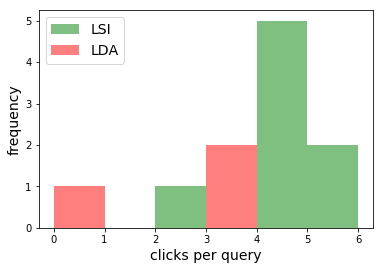

In [4]:
import matplotlib.pyplot as plt
% matplotlib inline

plt.hist(cpq_lsi, bins=[0,1,2,3,4,5,6], color='g', alpha=0.5, label='LSI');
plt.hist(cpq_lda, bins=[0,1,2,3,4,5,6], color='r', alpha=0.5, label='LDA');
plt.xlabel('clicks per query', fontsize=14)
plt.ylabel('frequency', fontsize=14)
plt.legend(fontsize=14)